In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Amazon.xlsx")
df = df.rename(columns={'Unnamed: 0': 'Nombres'})
df

,Nombres,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,Adam,205,3,345,235,24,23,26,21,17
1,Anna,9,15,315,33,25,4,42,215,28
2,Bernard,17,26,285,3,43,27,41,26,33
3,Edward,135,5,355,295,18,23,39,195,17
4,Emilia,3,45,48,39,34,46,225,34,43
...,...,...,...,...,...,...,...,...,...,...
95,Teofan,3,8,32,25,7,21,42,17,1
96,Teofil,305,25,46,24,33,28,355,26,45
97,Teofila,1,14,26,25,24,27,42,185,23
98,Teon,155,11,335,34,26,29,42,215,27


In [3]:
df_values = df.copy()
del df_values['Nombres']

In [4]:
from sklearn.preprocessing import normalize
df_scaled = normalize(df_values)
df_scaled

array([[0.43826336, 0.00641361, 0.73756517, 0.50239946, 0.05130888,
        0.04917101, 0.05558462, 0.04489527, 0.03634379],
       [0.02323527, 0.03872544, 0.81323434, 0.08519598, 0.06454241,
        0.01032679, 0.10843125, 0.55506471, 0.0722875 ],
       [0.05723452, 0.08753514, 0.95951982, 0.01010021, 0.14476966,
        0.09090188, 0.13803618, 0.08753514, 0.11110229],
       [0.25885639, 0.00958727, 0.68069644, 0.56564916, 0.03451419,
        0.04410146, 0.07478074, 0.37390368, 0.03259673],
       [0.01197502, 0.17962533, 0.19160036, 0.15567529, 0.13571692,
        0.18361701, 0.89812667, 0.13571692, 0.17164198],
       [0.14494006, 0.251738  , 0.60264551, 0.03661644, 0.03966781,
        0.02898801, 0.73995715, 0.03356507, 0.00457705],
       [0.04755854, 0.02481315, 0.98218723, 0.06823617, 0.07237169,
        0.09304932, 0.07857498, 0.05996511, 0.06410064],
       [0.13323393, 0.04304481, 0.06354234, 0.52268696, 0.05739308,
        0.04509456, 0.70716471, 0.44069685, 0.05944283],


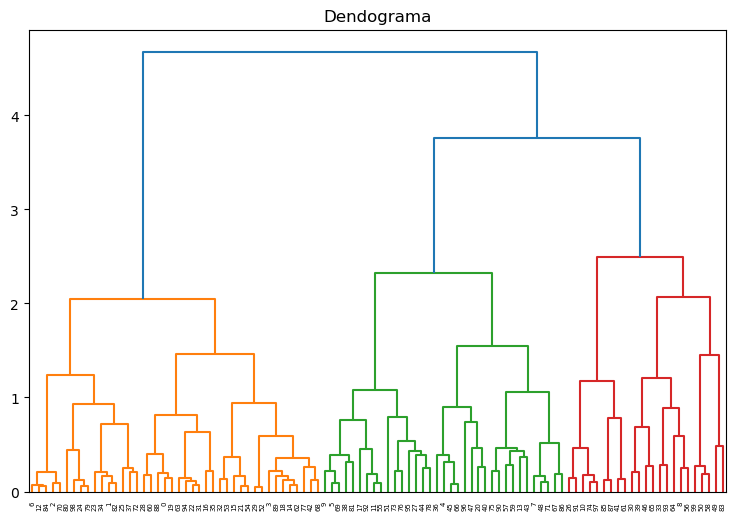

In [5]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (9,6))
plt.title('Dendograma')
dend = shc.dendrogram(shc.linkage(df_scaled, method = 'ward'))

In [6]:
colores_unicos = set(dend["color_list"]) 
num_clusters_optimo = len(colores_unicos) - 1
num_clusters_optimo

3

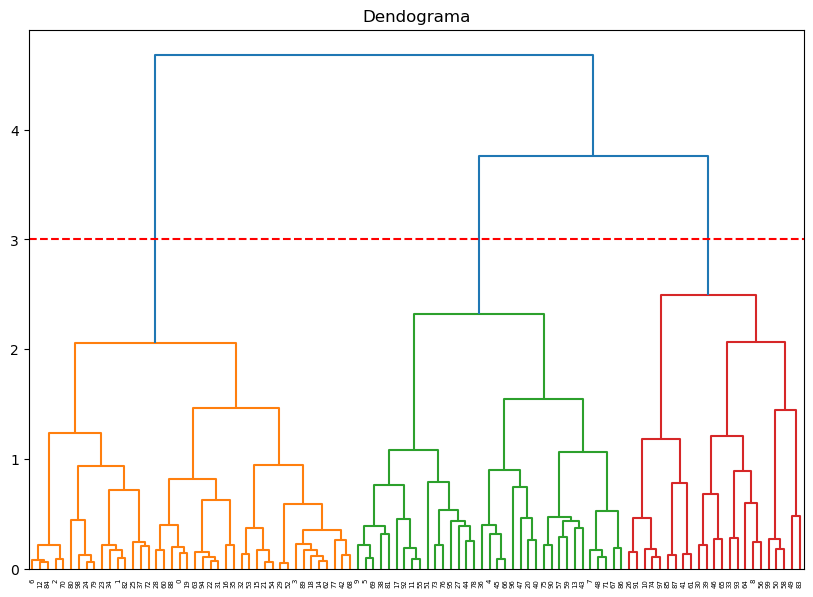

In [7]:
# Dendograma con con linea en le limete de clusters
plt.figure(figsize = (10,7))
plt.title('Dendograma')
dend = shc.dendrogram(shc.linkage(df_scaled, method = 'ward'))
plt.axhline(y = 3, color = 'r', linestyle = '--')

In [8]:
# Descomposicion en PCA
campos = df_scaled
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca.fit(campos)
campos = pca.transform(campos)
campos

array([[-0.39993219,  0.06035374],
       [-0.40829583, -0.06402268],
       [-0.49703182, -0.35955286],
       [-0.33996675,  0.18434501],
       [ 0.58207751, -0.38797653],
       [ 0.1723403 , -0.52962573],
       [-0.56528441, -0.33770585],
       [ 0.5335887 ,  0.06994712],
       [ 0.09981604,  0.47165743],
       [ 0.22195207, -0.56503313],
       [ 0.08274005,  0.39712712],
       [-0.00143465, -0.48936583],
       [-0.57292039, -0.35927774],
       [ 0.51350639,  0.01301312],
       [-0.35272162,  0.20639728],
       [-0.4688626 ,  0.0168001 ],
       [-0.25142488,  0.04599019],
       [-0.05456876, -0.22302796],
       [-0.36123131,  0.20553368],
       [-0.41087067,  0.02173183],
       [ 0.54207892, -0.03308916],
       [-0.5138909 , -0.0900875 ],
       [-0.4284552 , -0.0601418 ],
       [-0.42320562, -0.09945498],
       [-0.42610215,  0.06318626],
       [-0.10615885, -0.20376697],
       [ 0.19058214,  0.3966612 ],
       [-0.096838  , -0.33104612],
       [-0.51505714,

In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
grupos = cluster.fit_predict(df_scaled)
grupos

array([1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0,
       2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 0])

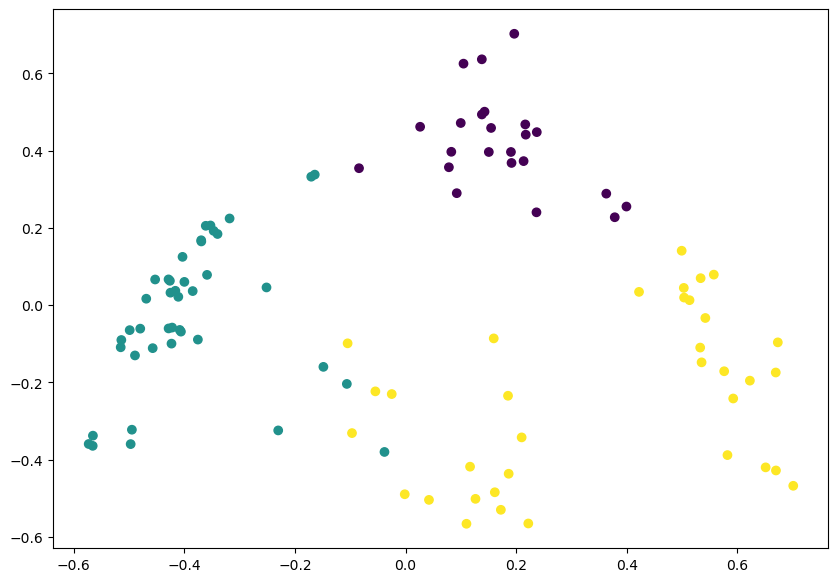

In [10]:
plt.figure(figsize = (10,7))
plt.scatter(campos[:, 0], campos[:, 1], c = cluster.labels_)

In [11]:
# Creacion de df_grups que contiene los grupos de cada observación, concatenacion del los dfs con sus 
# respectivos nombres y muestreo final 
df_grups = pd.DataFrame(grupos, columns = ['grupo'])
df_final = pd.concat([df, df_grups], axis = 1, join = 'inner')
pd.options.display.max_rows = None
df_final

,Nombres,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,grupo
0,Adam,205,3,345,235,24,23,26,21,17,1
1,Anna,9,15,315,33,25,4,42,215,28,1
2,Bernard,17,26,285,3,43,27,41,26,33,1
3,Edward,135,5,355,295,18,23,39,195,17,1
4,Emilia,3,45,48,39,34,46,225,34,43,2
5,Fabian,95,165,395,24,26,19,485,22,3,2
6,Philip,23,12,475,33,35,45,38,29,31,1
7,Frank,65,21,31,255,28,22,345,215,29,2
8,Xavier,275,8,47,235,35,3,38,27,48,0
9,Gabriel,2,175,325,3,37,32,435,27,39,2
